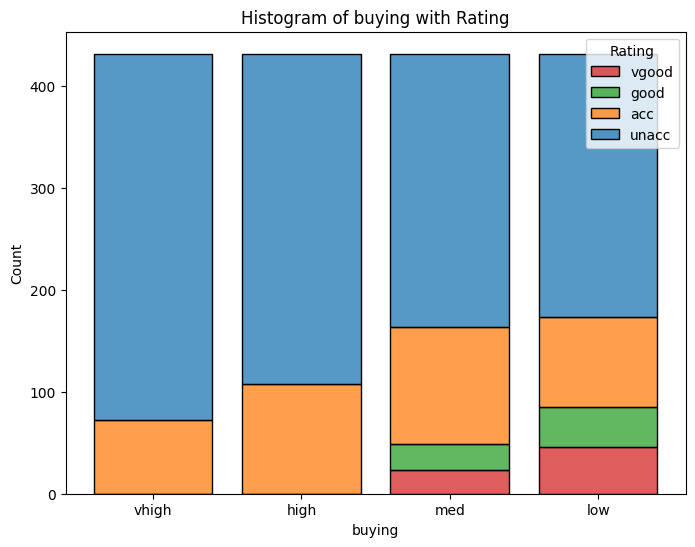

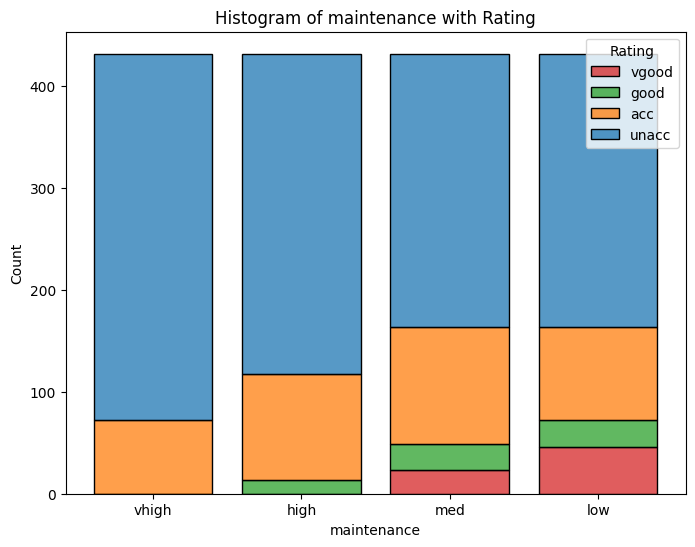

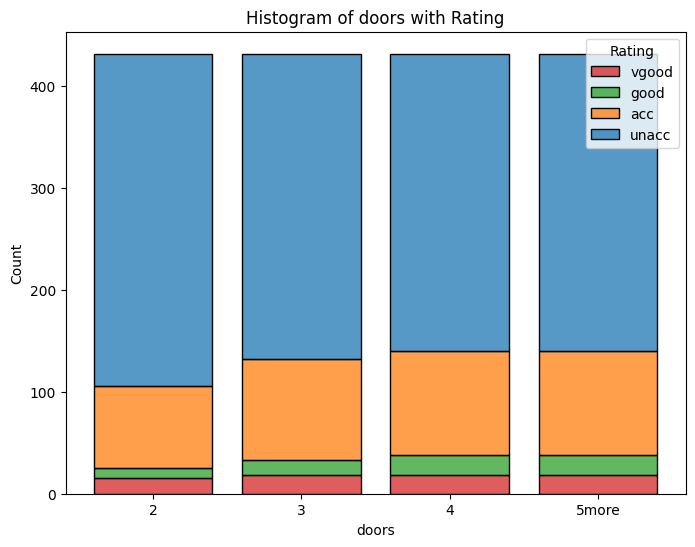

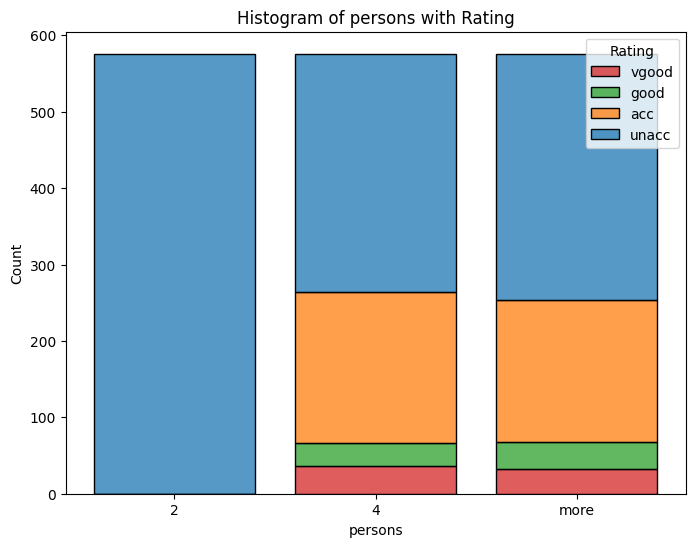

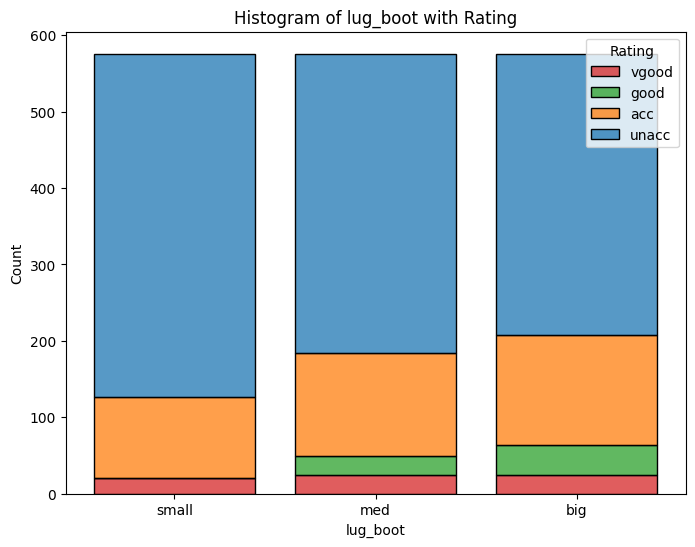

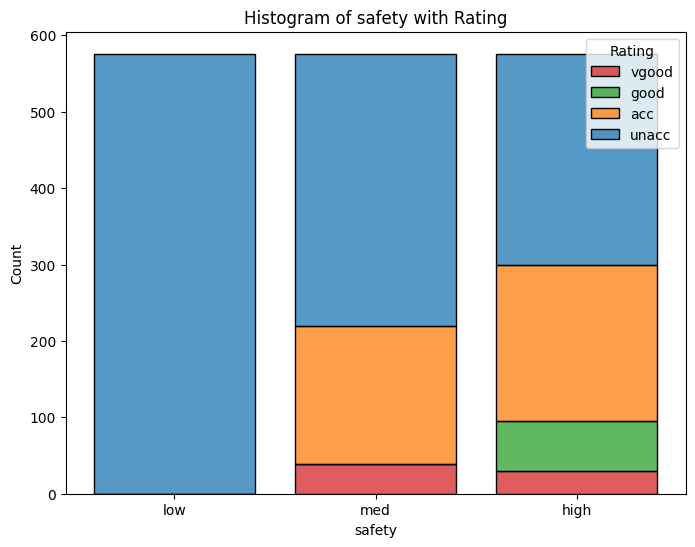

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open('../data/car_dataset/car.data') as file:
    data = pd.read_csv(file, sep=',', header=None)
    data.rename(columns={0: 'buying', 1: 'maintenance', 2: 'doors', 3: 'persons', 4: 'lug_boot', 5: 'safety', 6: 'rating'}, inplace=True)

legend_order = ['vgood', 'good', 'acc', 'unacc']

for column in data.columns[:-1]:  
    plt.figure(figsize=(8, 6))
    sns.histplot(data, x=column, hue='rating', multiple='stack', shrink=0.8)

    # Explicitly set legend labels in the desired order
    plt.legend(title='Rating', labels=legend_order)

    plt.title(f'Histogram of {column} with Rating')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


Classification Report for Gini:
              precision    recall  f1-score   support

         acc       0.90      0.94      0.92       118
        good       0.71      0.79      0.75        19
       unacc       1.00      0.98      0.99       358
       vgood       0.86      0.79      0.83        24

    accuracy                           0.96       519
   macro avg       0.87      0.88      0.87       519
weighted avg       0.96      0.96      0.96       519

Accuracy (Gini): 0.96

Classification Report for Entropy:
              precision    recall  f1-score   support

         acc       0.89      0.92      0.91       118
        good       0.75      0.79      0.77        19
       unacc       1.00      0.98      0.99       358
       vgood       0.81      0.88      0.84        24

    accuracy                           0.95       519
   macro avg       0.86      0.89      0.88       519
weighted avg       0.96      0.95      0.95       519

Accuracy (Entropy): 0.95

Class Counts:


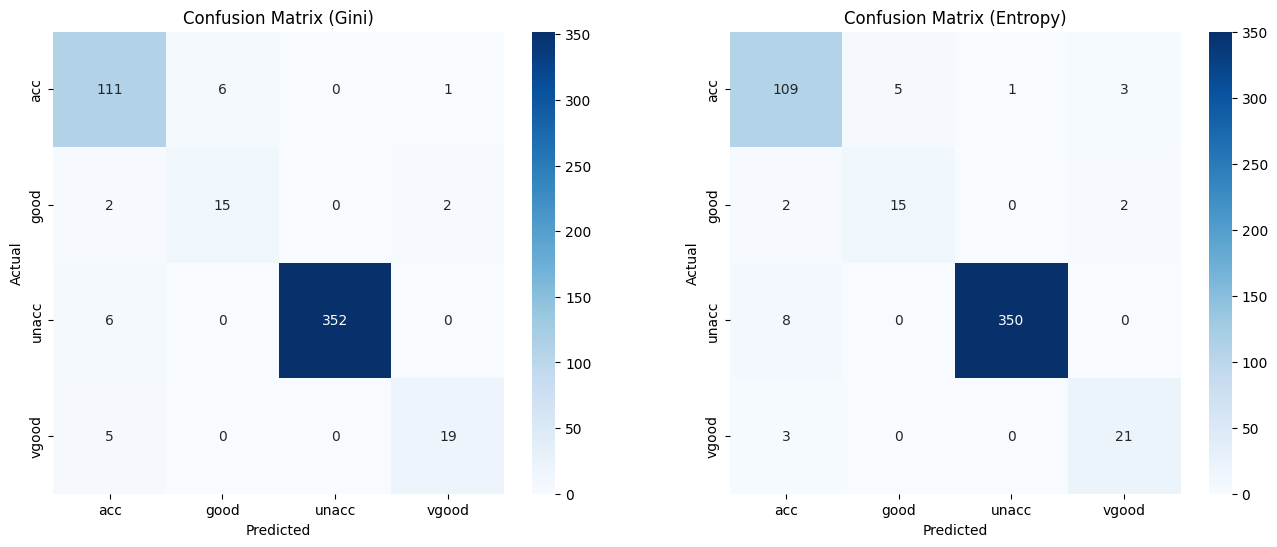

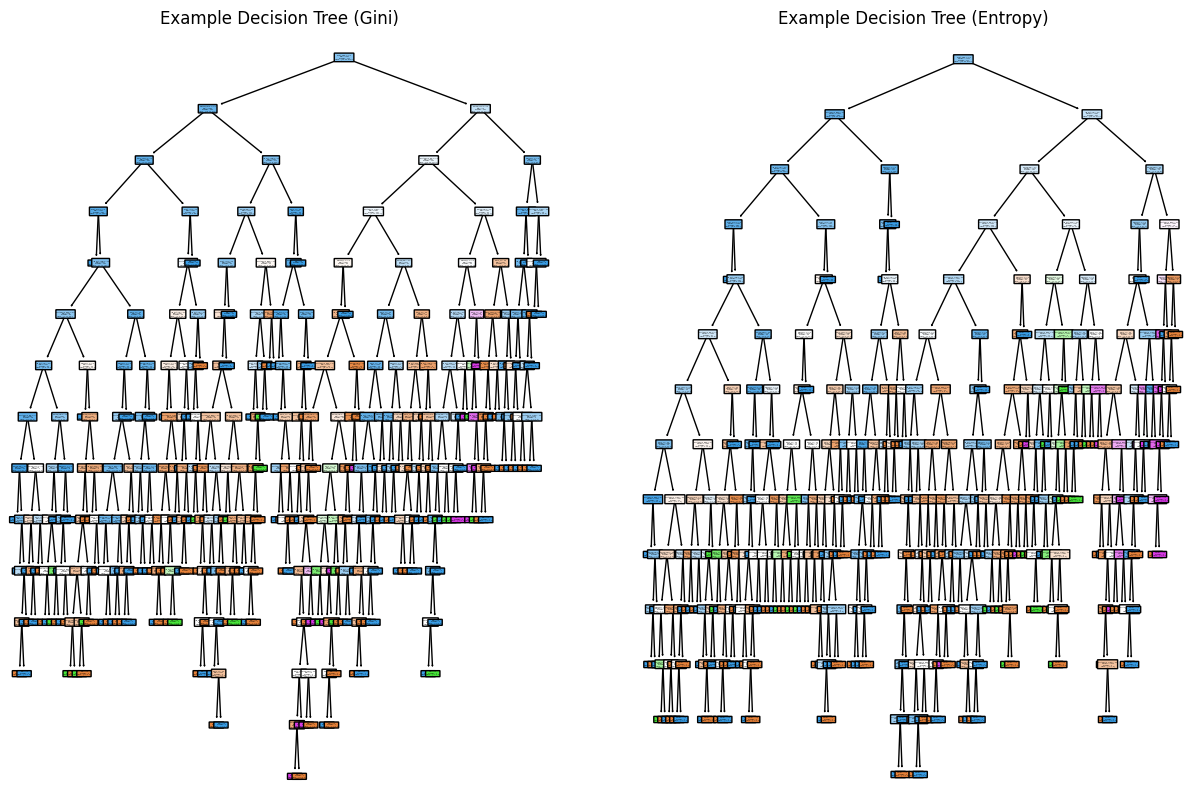

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Separate features (X) and target variable (y)
X = data.drop('rating', axis=1)
y = data['rating']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets with 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Classifiers with different criteria
rf_gini = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rf_entropy = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

# Train the classifiers
rf_gini.fit(X_train, y_train)
rf_entropy.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gini = rf_gini.predict(X_test)
y_pred_entropy = rf_entropy.predict(X_test)

# Evaluate the models
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Display the classification reports
print('Classification Report for Gini:')
print(classification_report(y_test, y_pred_gini))
print(f'Accuracy (Gini): {accuracy_gini:.2f}')

print('\nClassification Report for Entropy:')
print(classification_report(y_test, y_pred_entropy))
print(f'Accuracy (Entropy): {accuracy_entropy:.2f}')

# Confusion Matrices
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

# Print the count of each class
class_counts = y_test.value_counts()
print('\nClass Counts:')
print(class_counts)

# Plot the Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gini
sns.heatmap(conf_matrix_gini, annot=True, fmt='d', cmap='Blues', xticklabels=rf_gini.classes_, yticklabels=rf_gini.classes_, ax=axes[0])
axes[0].set_title('Confusion Matrix (Gini)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Entropy
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Blues', xticklabels=rf_entropy.classes_, yticklabels=rf_entropy.classes_, ax=axes[1])
axes[1].set_title('Confusion Matrix (Entropy)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

# Extract one example tree from each RandomForestClassifier
example_tree_gini = rf_gini.estimators_[0]
example_tree_entropy = rf_entropy.estimators_[0]

# Visualize the example trees
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_tree(example_tree_gini, feature_names=X.columns, class_names=rf_gini.classes_, filled=True, rounded=True)
plt.title('Example Decision Tree (Gini)')

plt.subplot(1, 2, 2)
plot_tree(example_tree_entropy, feature_names=X.columns, class_names=rf_entropy.classes_, filled=True, rounded=True)
plt.title('Example Decision Tree (Entropy)')

plt.show()